In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import math as m
import scipy.stats as stats


In [ ]:
#Exercitiul 1

In [14]:
np.random.seed(123)
draws = 5
coin_sample = np.random.binomial(1, 0.5, draws)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws)]

heads = np.sum(coin_sample[coin_sample==1])
print('Heads: ', heads, heads/draws)
print('Tails: ', draws-heads, 1-heads/draws)

Heads:  3 0.6
Tails:  2 0.4


In [23]:
stats.binom_test(x=[3, 2], p=0.5, alternative='two-sided')

1.0

In [34]:
stats.chisquare(f_obs=[3, 2])

Power_divergenceResult(statistic=0.2, pvalue=0.6547208460185768)

In [40]:
print('The coin is unbaised')

The coin is unbaised


In [27]:
np.random.seed(123)
draws = 10
coin_sample = np.random.binomial(1, 0.5, draws)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws)]

heads = np.sum(coin_sample[coin_sample==1])
print('Heads: ', heads, heads/draws)
print('Tails: ', draws-heads, 1-heads/draws)

Heads:  5 0.5
Tails:  5 0.5


In [28]:
stats.binom_test(x=[5, 5], p=0.5, alternative='two-sided')

1.0

In [38]:
stats.chisquare(f_obs=[5, 5])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [39]:
print('The coin is unbaised')

The coin is unbaised


In [32]:
np.random.seed(123)
draws = 30
coin_sample = np.random.binomial(1, 0.5, draws)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws)]

heads = np.sum(coin_sample[coin_sample==1])
print('Heads: ', heads, heads/draws)
print('Tails: ', draws-heads, 1-heads/draws)

Heads:  15 0.5
Tails:  15 0.5


In [30]:
stats.binom_test(x=[15, 15], p=0.5, alternative='two-sided')

1.0

In [36]:
stats.chisquare(f_obs=[15, 15])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [37]:
 print('The coin is unbaised')
    

The coin is unbaised


In [ ]:
#Exercitiul 2

In [39]:
pearson = pd.read_csv('pearson.csv')

In [46]:
pearson.head(30)

,child,parent,frequency,gp,par,chl
0,59.5,62.5,0.50,fs,Father,Son
1,59.5,63.5,0.50,fs,Father,Son
2,59.5,64.5,1.00,fs,Father,Son
3,60.5,62.5,0.50,fs,Father,Son
4,60.5,66.5,1.00,fs,Father,Son
5,61.5,59.5,0.25,fs,Father,Son
6,61.5,60.5,0.25,fs,Father,Son
7,61.5,62.5,0.50,fs,Father,Son
8,61.5,63.5,1.00,fs,Father,Son
9,61.5,64.5,0.25,fs,Father,Son


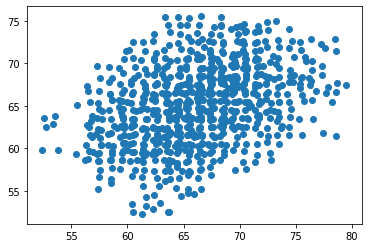

In [40]:
plt.scatter(
    pearson['child'] + np.random.normal(scale=0.2, size=pearson.shape[0]), 
    pearson['parent'] + np.random.normal(scale=0.2, size=pearson.shape[0]))

In [42]:
ms = pearson[pearson['gp']=='ms']
md = pearson[pearson['gp']=='md']

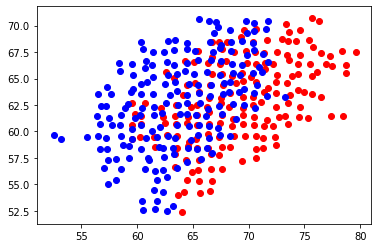

In [43]:
plt.scatter(
    ms['child'] + np.random.normal(scale=0.2, size=ms.shape[0]), 
    ms['parent'] + np.random.normal(scale=0.2, size=ms.shape[0]), c='r')
plt.scatter(
    md['child'] + np.random.normal(scale=0.2, size=md.shape[0]), 
    md['parent'] + np.random.normal(scale=0.2, size=md.shape[0]), c='b')
plt.show()

In [44]:
stats.pearsonr(ms['parent'], ms['child'])

(0.48491768425178605, 9.100362271637274e-12)

In [47]:
stats.pearsonr(md['parent'], md['child'])

(0.4674367713012403, 1.9747722235598635e-11)

In [ ]:
#Rezultate sunt similare cu cele de la legatura dintre tata-copii, o diferenta mai mare fiind la rezultatele obtinute 
#la legatura dintre mama-fiica.

In [ ]:
#Exercitiul 3

In [15]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as spst

import seaborn as sns


In [77]:
credit = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Credit.csv', index_col=0)
credit.to_csv('./credit.csv', index=False)

credit = pd.read_csv('./credit.csv')

credit.head(20)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


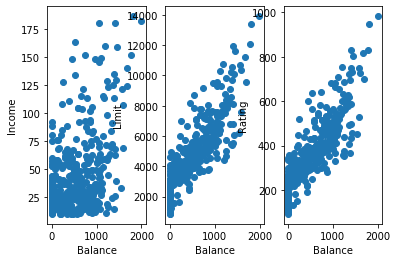

In [17]:
plt.subplot(131)
plt.scatter(credit['Balance'], credit['Income'])
plt.xlabel('Balance')
plt.ylabel('Income')

plt.subplot(132)
plt.scatter(credit['Balance'], credit['Limit'])
plt.xlabel('Balance')
plt.ylabel('Limit')

plt.subplot(133)
plt.scatter(credit['Balance'], credit['Rating'])
plt.xlabel('Balance')
plt.ylabel('Rating')



plt.show()

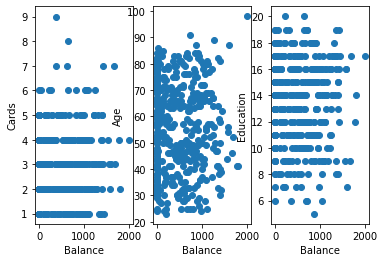

In [18]:
plt.subplot(131)
plt.scatter(credit['Balance'], credit['Cards'])
plt.xlabel('Balance')
plt.ylabel('Cards')

plt.subplot(132)
plt.scatter(credit['Balance'], credit['Age'])
plt.xlabel('Balance')
plt.ylabel('Age')

plt.subplot(133)
plt.scatter(credit['Balance'], credit['Education'])
plt.xlabel('Balance')
plt.ylabel('Education')

plt.show()

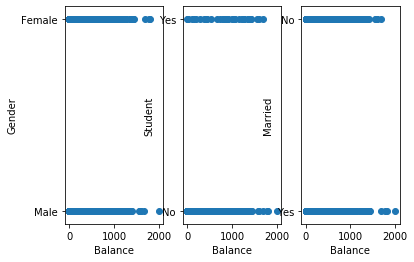

In [19]:
plt.subplot(131)
plt.scatter(credit['Balance'], credit['Gender'])
plt.xlabel('Balance')
plt.ylabel('Gender')

plt.subplot(132)
plt.scatter(credit['Balance'], credit['Student'])
plt.xlabel('Balance')
plt.ylabel('Student')

plt.subplot(133)
plt.scatter(credit['Balance'], credit['Married'])
plt.xlabel('Balance')
plt.ylabel('Married')


plt.show()

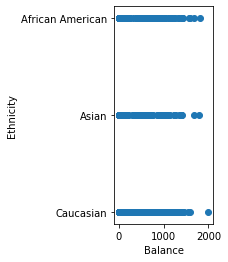

In [13]:
plt.subplot(131)
plt.scatter(credit['Balance'], credit['Ethnicity'])
plt.xlabel('Balance')
plt.ylabel('Ethnicity')

plt.show()

In [31]:
var1 = smf.ols('Balance ~ Income', data=credit).fit()
print(var1.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187


In [43]:
lm1 = smf.ols('Balance ~ Income', credit).fit()
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.03e-22
Time:                        11:55:24   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
var2 = smf.ols('Balance ~ Limit', data=credit).fit()
print(var2.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -292.7905     26.683    -10.973      0.000    -345.249    -240.332
Limit          0.1716      0.005     33.879      0.000       0.162       0.182


In [44]:
lm1 = smf.ols('Balance ~ Limit', credit).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1148.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):          2.53e-119
Time:                        11:56:23   Log-Likelihood:                -2748.0
No. Observations:                 400   AIC:                             5500.
Df Residuals:                     398   BIC:                             5508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -292.7905     26.683    -10.973      0.000    -345.249    -240.332
Limit          0.1716      0.005     33.879      0.000       0.162       0.182
==============================================================================
Omnibus:                       22.506   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.676
Skew:                           0.418   Prob(JB):                     4.87e-08
Kurtosis:                       4.150   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
var3 = smf.ols('Balance ~ Rating', data=credit).fit()
print(var3.summary().tables[1])


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714


In [45]:
lm1 = smf.ols('Balance ~ Rating', credit).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):          1.90e-120
Time:                        11:56:43   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
var4 = smf.ols('Balance ~ Cards', data=credit).fit()
print(var4.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    434.2861     54.569      7.958      0.000     327.006     541.566
Cards         28.9869     16.743      1.731      0.084      -3.929      61.903


In [46]:
lm1 = smf.ols('Balance ~ Cards', credit).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.997
Date:                Thu, 14 Nov 2019   Prob (F-statistic):             0.0842
Time:                        11:57:04   Log-Likelihood:                -3017.9
No. Observations:                 400   AIC:                             6040.
Df Residuals:                     398   BIC:                             6048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    434.2861     54.569      7.958      0.000     327.006     541.566
Cards         28.9869     16.743      1.731      0.084      -3.929      61.903
==============================================================================
Omnibus:                       28.964   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.603
Skew:                           0.566   Prob(JB):                     1.67e-06
Kurtosis:                       2.437   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
var5 = smf.ols('Balance ~ Age', data=credit).fit()
print(var5.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.2922     77.852      6.645      0.000     364.241     670.344
Age            0.0489      1.336      0.037      0.971      -2.578       2.675


In [47]:
lm1 = smf.ols('Balance ~ Age', credit).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.001340
Date:                Thu, 14 Nov 2019   Prob (F-statistic):              0.971
Time:                        11:57:22   Log-Likelihood:                -3019.4
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.2922     77.852      6.645      0.000     364.241     670.344
Age            0.0489      1.336      0.037      0.971      -2.578       2.675
==============================================================================
Omnibus:                       28.715   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.393
Skew:                           0.582   Prob(JB):                     1.13e-06
Kurtosis:                       2.463   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
var6 = smf.ols('Balance ~ Education', data=credit).fit()
print(var6.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    535.9662    101.814      5.264      0.000     335.805     736.127
Education     -1.1860      7.374     -0.161      0.872     -15.683      13.311


In [48]:
lm1 = smf.ols('Balance ~ Education', credit).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.02587
Date:                Thu, 14 Nov 2019   Prob (F-statistic):              0.872
Time:                        11:57:52   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    535.9662    101.814      5.264      0.000     335.805     736.127
Education     -1.1860      7.374     -0.161      0.872     -15.683      13.311
==============================================================================
Omnibus:                       28.655   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.467
Skew:                           0.584   Prob(JB):                     1.09e-06
Kurtosis:                       2.467   Cond. No.                         61.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
var7 = smf.ols('Balance ~ Gender', data=credit).fit()
print(var7.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        529.5362     31.988     16.554      0.000     466.649     592.423
Gender[T.Male]   -19.7331     46.051     -0.429      0.669    -110.267      70.801


In [49]:
lm1 = smf.ols('Balance ~ Gender', credit).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 14 Nov 2019   Prob (F-statistic):              0.669
Time:                        11:58:12   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        529.5362     31.988     16.554      0.000     466.649     592.423
Gender[T.Male]   -19.7331     46.051     -0.429      0.669    -110.267      70.801
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
var8 = smf.ols('Balance ~ Student', data=credit).fit()
print(var8.summary().tables[1])lm1 = smf.ols('Balance ~ Income', credit).fit()
lm1.summary()

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140


In [50]:
lm1 = smf.ols('Balance ~ Student', credit).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.49e-07
Time:                        11:58:34   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
var9 = smf.ols('Balance ~ Married', data=credit).fit()
print(var9.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        523.2903     36.974     14.153      0.000     450.601     595.980
Married[T.Yes]    -5.3475     47.244     -0.113      0.910     -98.227      87.532


In [51]:
lm1 = smf.ols('Balance ~ Married', credit).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01281
Date:                Thu, 14 Nov 2019   Prob (F-statistic):              0.910
Time:                        11:58:53   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        523.2903     36.974     14.153      0.000     450.601     595.980
Married[T.Yes]    -5.3475     47.244     -0.113      0.910     -98.227      87.532
==============================================================================
Omnibus:                       28.640   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.347
Skew:                           0.582   Prob(JB):                     1.15e-06
Kurtosis:                       2.464   Cond. No.                         2.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
var10 = smf.ols('Balance ~ Ethnicity', data=credit).fit()
print(var10.summary().tables[1])

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930


In [52]:
lm1 = smf.ols('Balance ~ Ethnicity', credit).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Thu, 14 Nov 2019   Prob (F-statistic):              0.957
Time:                        11:59:31   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
lm = smf.ols('Balance ~  Income + Limit + Rating + Cards + Student + Age + Education + Gender + Married + Ethnicity', data=credit).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Thu, 14 Nov 2019   Prob (F-statistic):          1.11e-253
Time:                        12:32:42   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -489

In [ ]:
#Cele semnificative sunt: Income, Limit, Rating, Cards, Age si Student, deoarece daca privim asupra valorilor lui P calculate, observam cele mai mici valori.

In [ ]:
#Noul model construit cu :Income, Limit, Rating, Cards, Age si Student.

In [76]:
lm = smf.ols('Balance~ Income + Limit + Rating + Cards +Age + Student', credit).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1380.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):          1.58e-260
Time:                        13:06:47   Log-Likelihood:                -2400.5
No. Observations:                 400   AIC:                             4815.
Df Residuals:                     393   BIC:                             4843.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -493.7342     24.825    -19.